In [18]:
# computational import
import numpy as np
import xarray as xr
import scipy as sc

# plotting import
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean
# AWS import
import s3fs

In [19]:
#AWS set up
bucket_name = 'hycom-global-drifters'

s3 = s3fs.S3FileSystem(anon=True)


In [20]:
# choose step and depth
step = 1
depth = 0
# define the path of the zarr store:
zarr_store_path = bucket_name+'/lagrangian/global_hycom_'+str(depth)+'m_step_'+str(step)+'.zarr'

In [21]:
# open dataset from bucket
ds = xr.open_zarr(s3.get_mapper(zarr_store_path), consolidated=True)

In [22]:
# designate bins
lon = np.linspace(-180,180, 360*2)
lat = np.linspace(-90, 90, 180*2)

In [17]:
# calculate 2dstats
count = sc.stats.binned_statistic_2d(ds.lon.to_numpy().flatten(), 
                                ds.lat.to_numpy().flatten(),
                                ds.obs.to_numpy().flatten(),
                                statistic = 'count',
                                bins= [lon,lat])

In [23]:
# save in a dataset
countds = xr.Dataset(data_vars=dict(aws_bucket = (['lon','lat'], count.statistic),
                                 ),
          coords = dict(lon = count.x_edge[0:-1], lat = count.y_edge[0:-1]),)


In [24]:
# open datasets made in .py script with hpc datasets
ds = xr.open_dataset('/Users/elifaigle/desktop/aws/hycom_aws_density_1_testing.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 719, lat: 359)
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 87.99 88.5 89.0 89.5
Data variables:
    aws_hpc  (lon, lat) float64 ...
    hycom    (lon, lat) float64 ...

In [25]:
# import datelist for plotting
dlist = ['31-Jan-2014','02-Mar-2014','01-Apr-2014','01-May-2014','31-May-2014','30-Jun-2014',
    '30-Jul-2014','29-Aug-2014','28-Sep-2014','28-Oct-2014','27-Nov-2014']

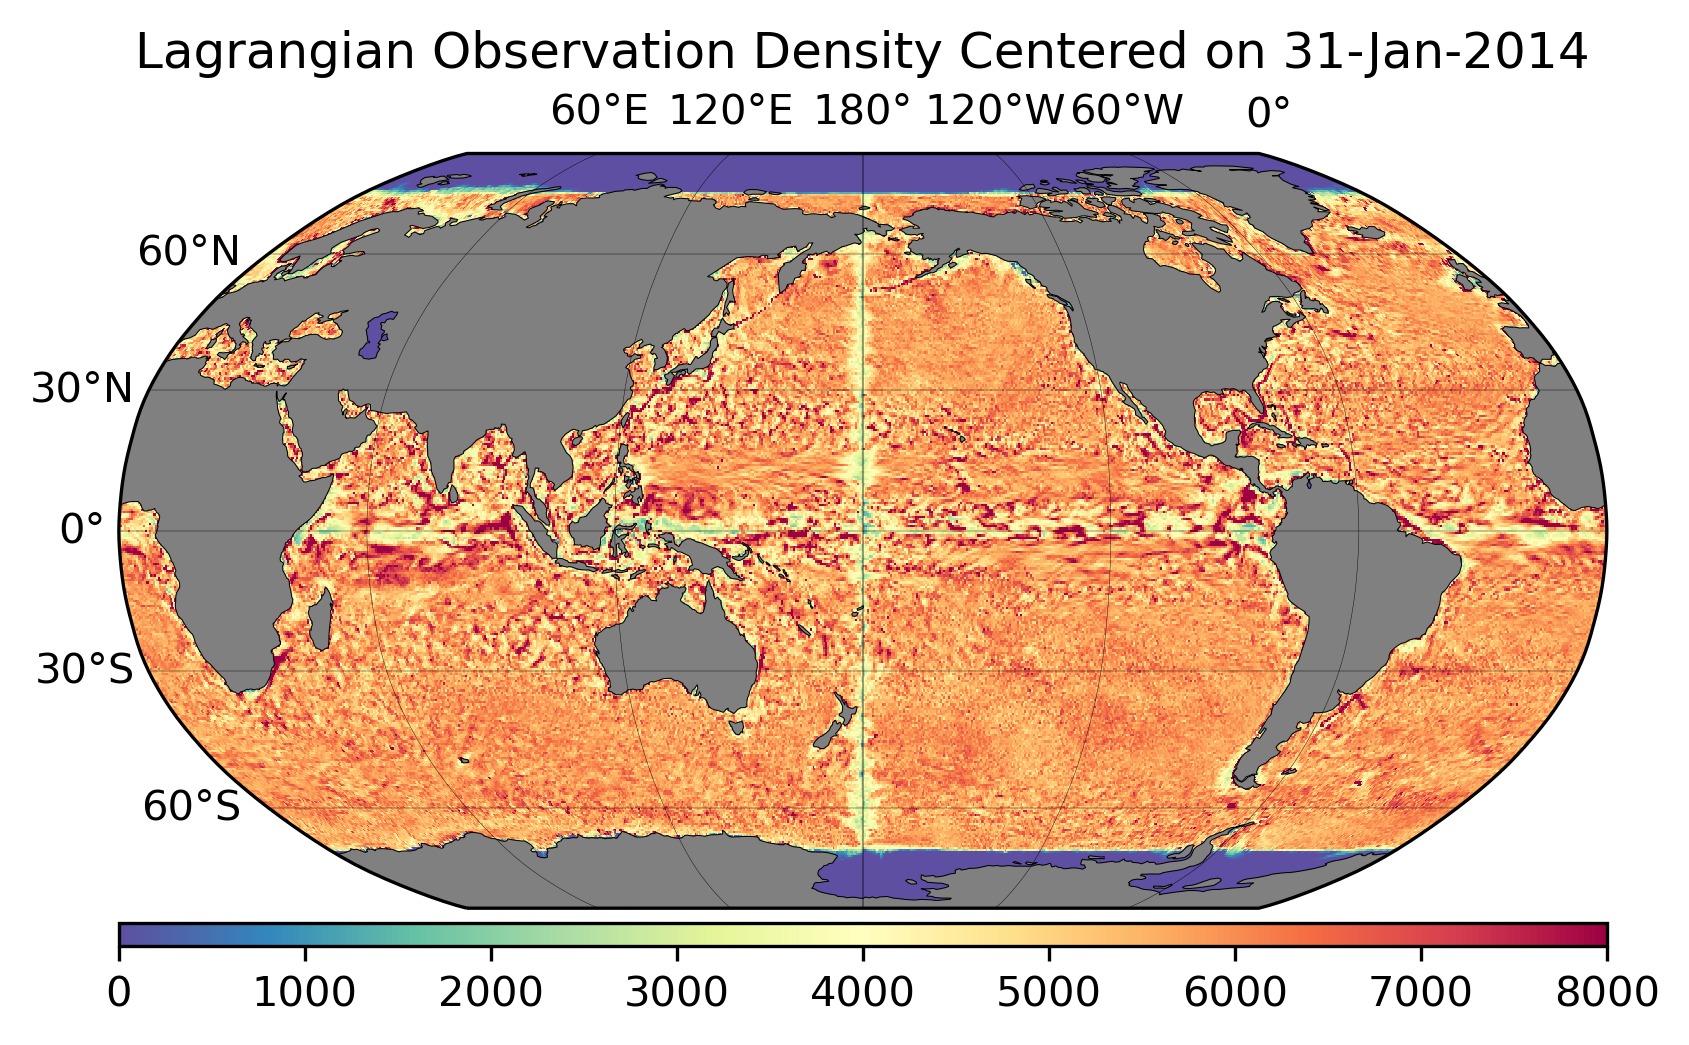

In [26]:
cmap = plt.colormaps.get_cmap('Spectral_r')
#x1, x2 = np.nanpercentile((ds0wmean[int(i)]['density']),[1,99])  

fig1 = plt.figure(dpi=300)
ax1 = fig1.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                    ds['hycom'].transpose(),
                    cmap=cmap, 
                    transform=ccrs.PlateCarree(),
                    vmin=0, vmax=8000) 

# gridlines and labels
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle = '-',
        xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
        draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig1.colorbar(image, cax=cax, orientation = "horizontal");
ax1.set_title('Lagrangian Observation Density Centered on '+dlist[0]);

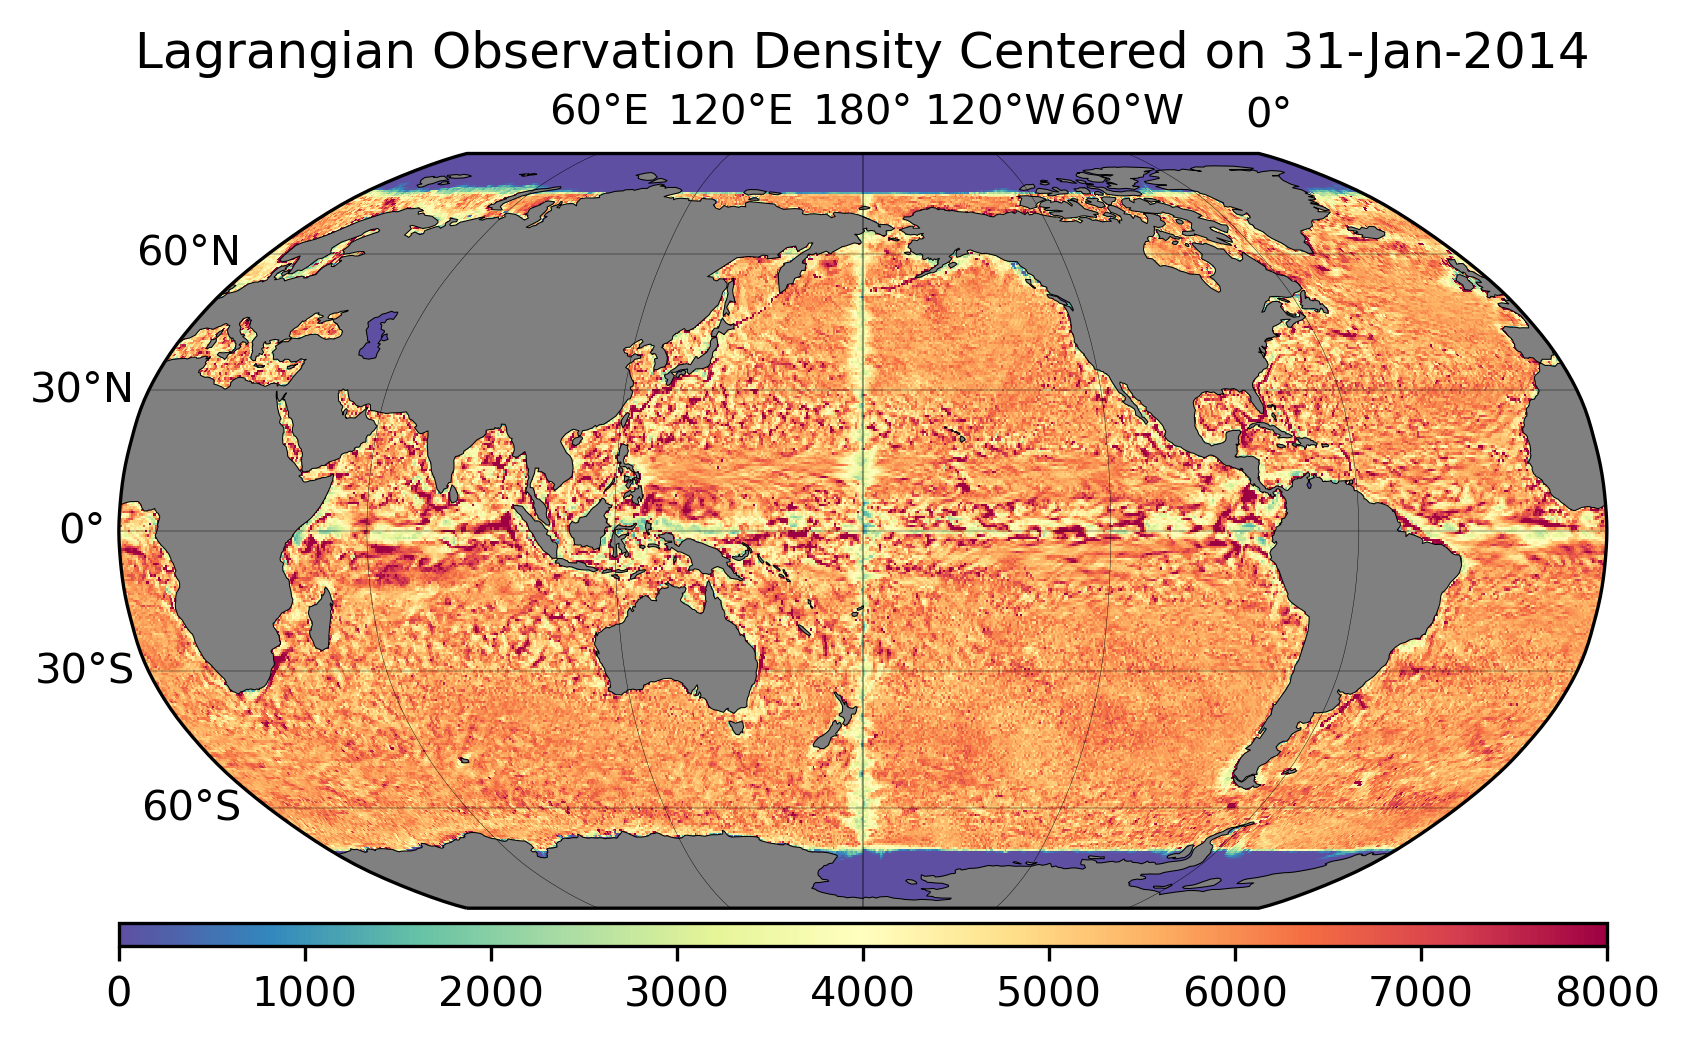

In [27]:
cmap = plt.colormaps.get_cmap('Spectral_r')
#x1, x2 = np.nanpercentile((ds0wmean[int(i)]['density']),[1,99])  

fig1 = plt.figure(dpi=300)
ax1 = fig1.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                    ds['aws_hpc'].transpose(),
                    cmap=cmap, 
                    transform=ccrs.PlateCarree(),
                    vmin=0, vmax=8000) 

# gridlines and labels
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle = '-',
        xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
        draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig1.colorbar(image, cax=cax, orientation = "horizontal");
ax1.set_title('Lagrangian Observation Density Centered on '+dlist[0]);

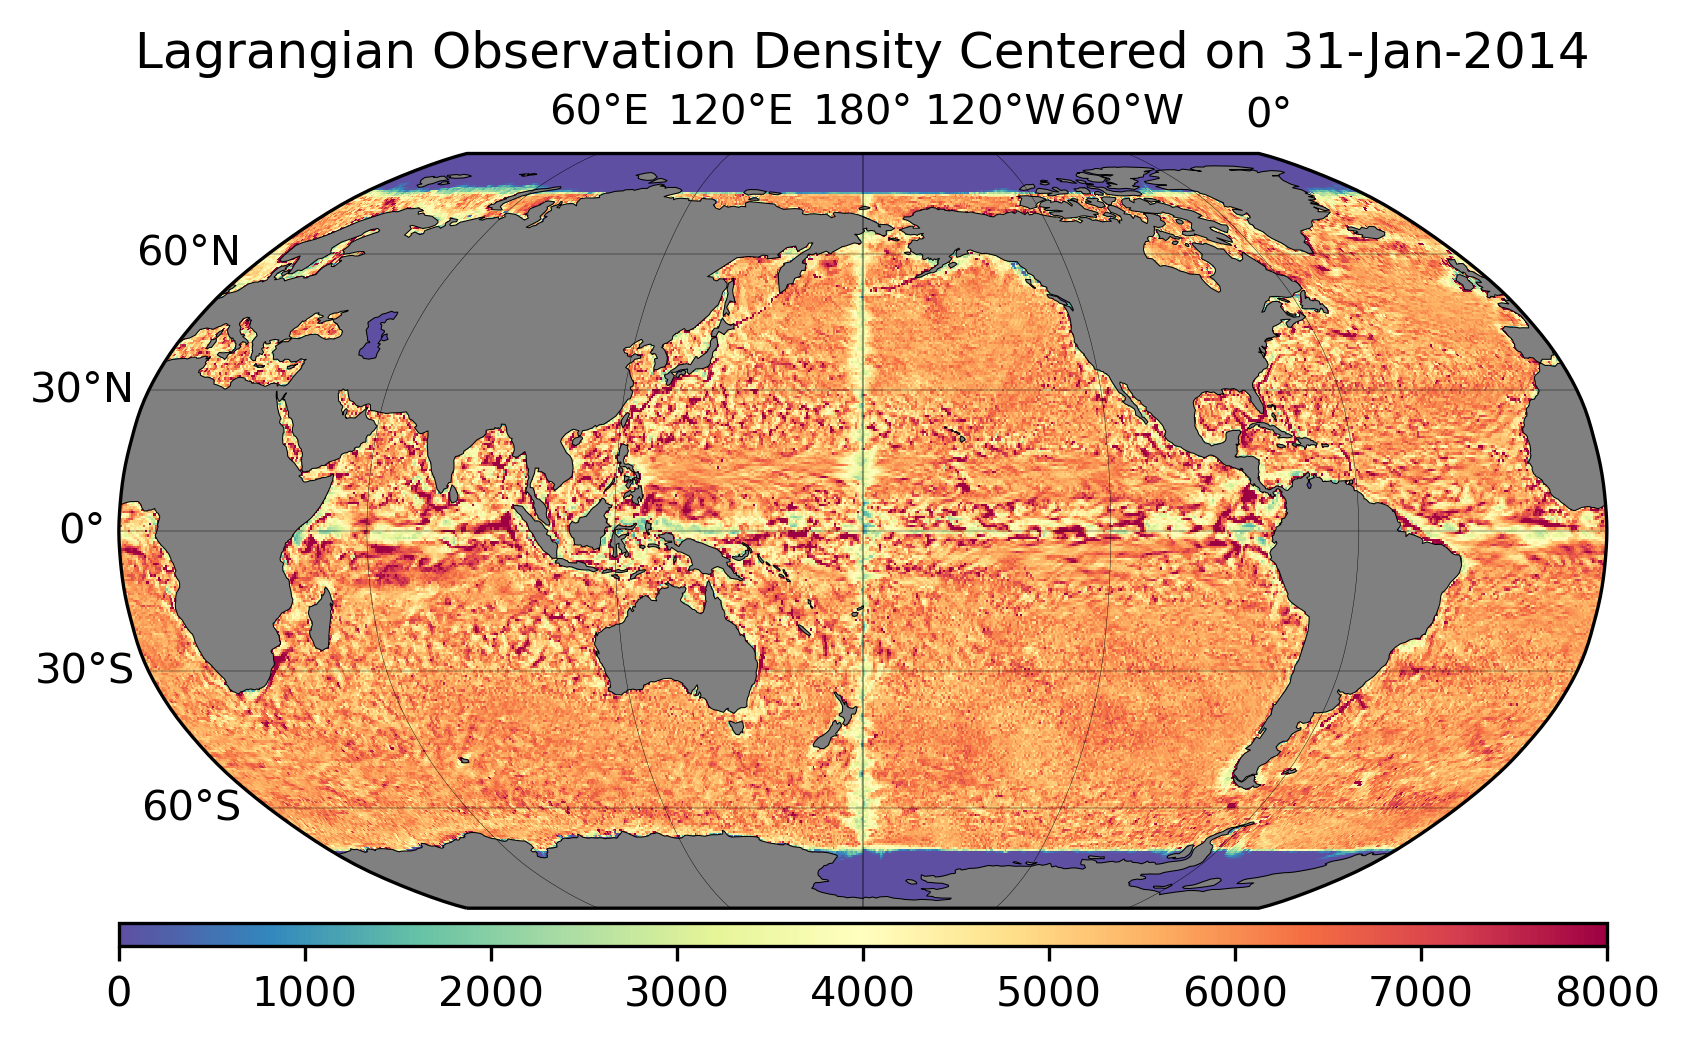

In [28]:
cmap = plt.colormaps.get_cmap('Spectral_r')
#x1, x2 = np.nanpercentile((ds0wmean[int(i)]['density']),[1,99])  

fig1 = plt.figure(dpi=300)
ax1 = fig1.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                    countds['aws_bucket'].transpose(),
                    cmap=cmap, 
                    transform=ccrs.PlateCarree(),
                    vmin=0, vmax=8000) 

# gridlines and labels
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle = '-',
        xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
        draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig1.colorbar(image, cax=cax, orientation = "horizontal");
ax1.set_title('Lagrangian Observation Density Centered on '+dlist[0]);